<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [2]:
# Read CSV
house_csv = "Sacramento_transactions.csv"
houses = pd.read_csv("../../DATA/Sacramento_transactions.csv")

In [3]:
sns.heatmap(houses, annot=True, cbar=True)
plt.show()

ValueError: could not convert string to float: '3526 HIGH ST'

In [56]:
houses.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [57]:
houses.describe().T

,count,mean,std,min,25%,50%,75%,max
zip,985.0,95750.697462,85.176072,95603.000000,95660.000000,95762.000000,95828.000000,95864.000000
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


In [58]:
houses['type'].value_counts()

type
Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: count, dtype: int64

In [59]:
houses['zip'].value_counts()

zip
95648    72
95823    61
95828    45
95758    44
95838    37
         ..
95619     1
95614     1
95690     1
95633     1
95722     1
Name: count, Length: 68, dtype: int64

In [60]:
houses['city'].value_counts()

city
SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
GALT                21
NORTH HIGHLANDS     21
CARMICHAEL          20
FOLSOM              17
ROCKLIN             17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
WILTON               5
AUBURN               5
GOLD RIVER           4
ELVERTA              4
WEST SACRAMENTO      3
RANCHO MURIETA       3
POLLOCK PINES        3
GRANITE BAY          3
LOOMIS               2
EL DORADO            2
MATHER               1
PENRYN               1
MEADOW VISTA         1
FORESTHILL           1
DIAMOND SPRINGS      1
SHINGLE SPRINGS      1
COOL                 1
WALNUT GROVE         1
GARDEN VALLEY        1
SLOUGHHOUSE          1
GREENWOOD            1
Name: count, dtype: int64

In [61]:
houses.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

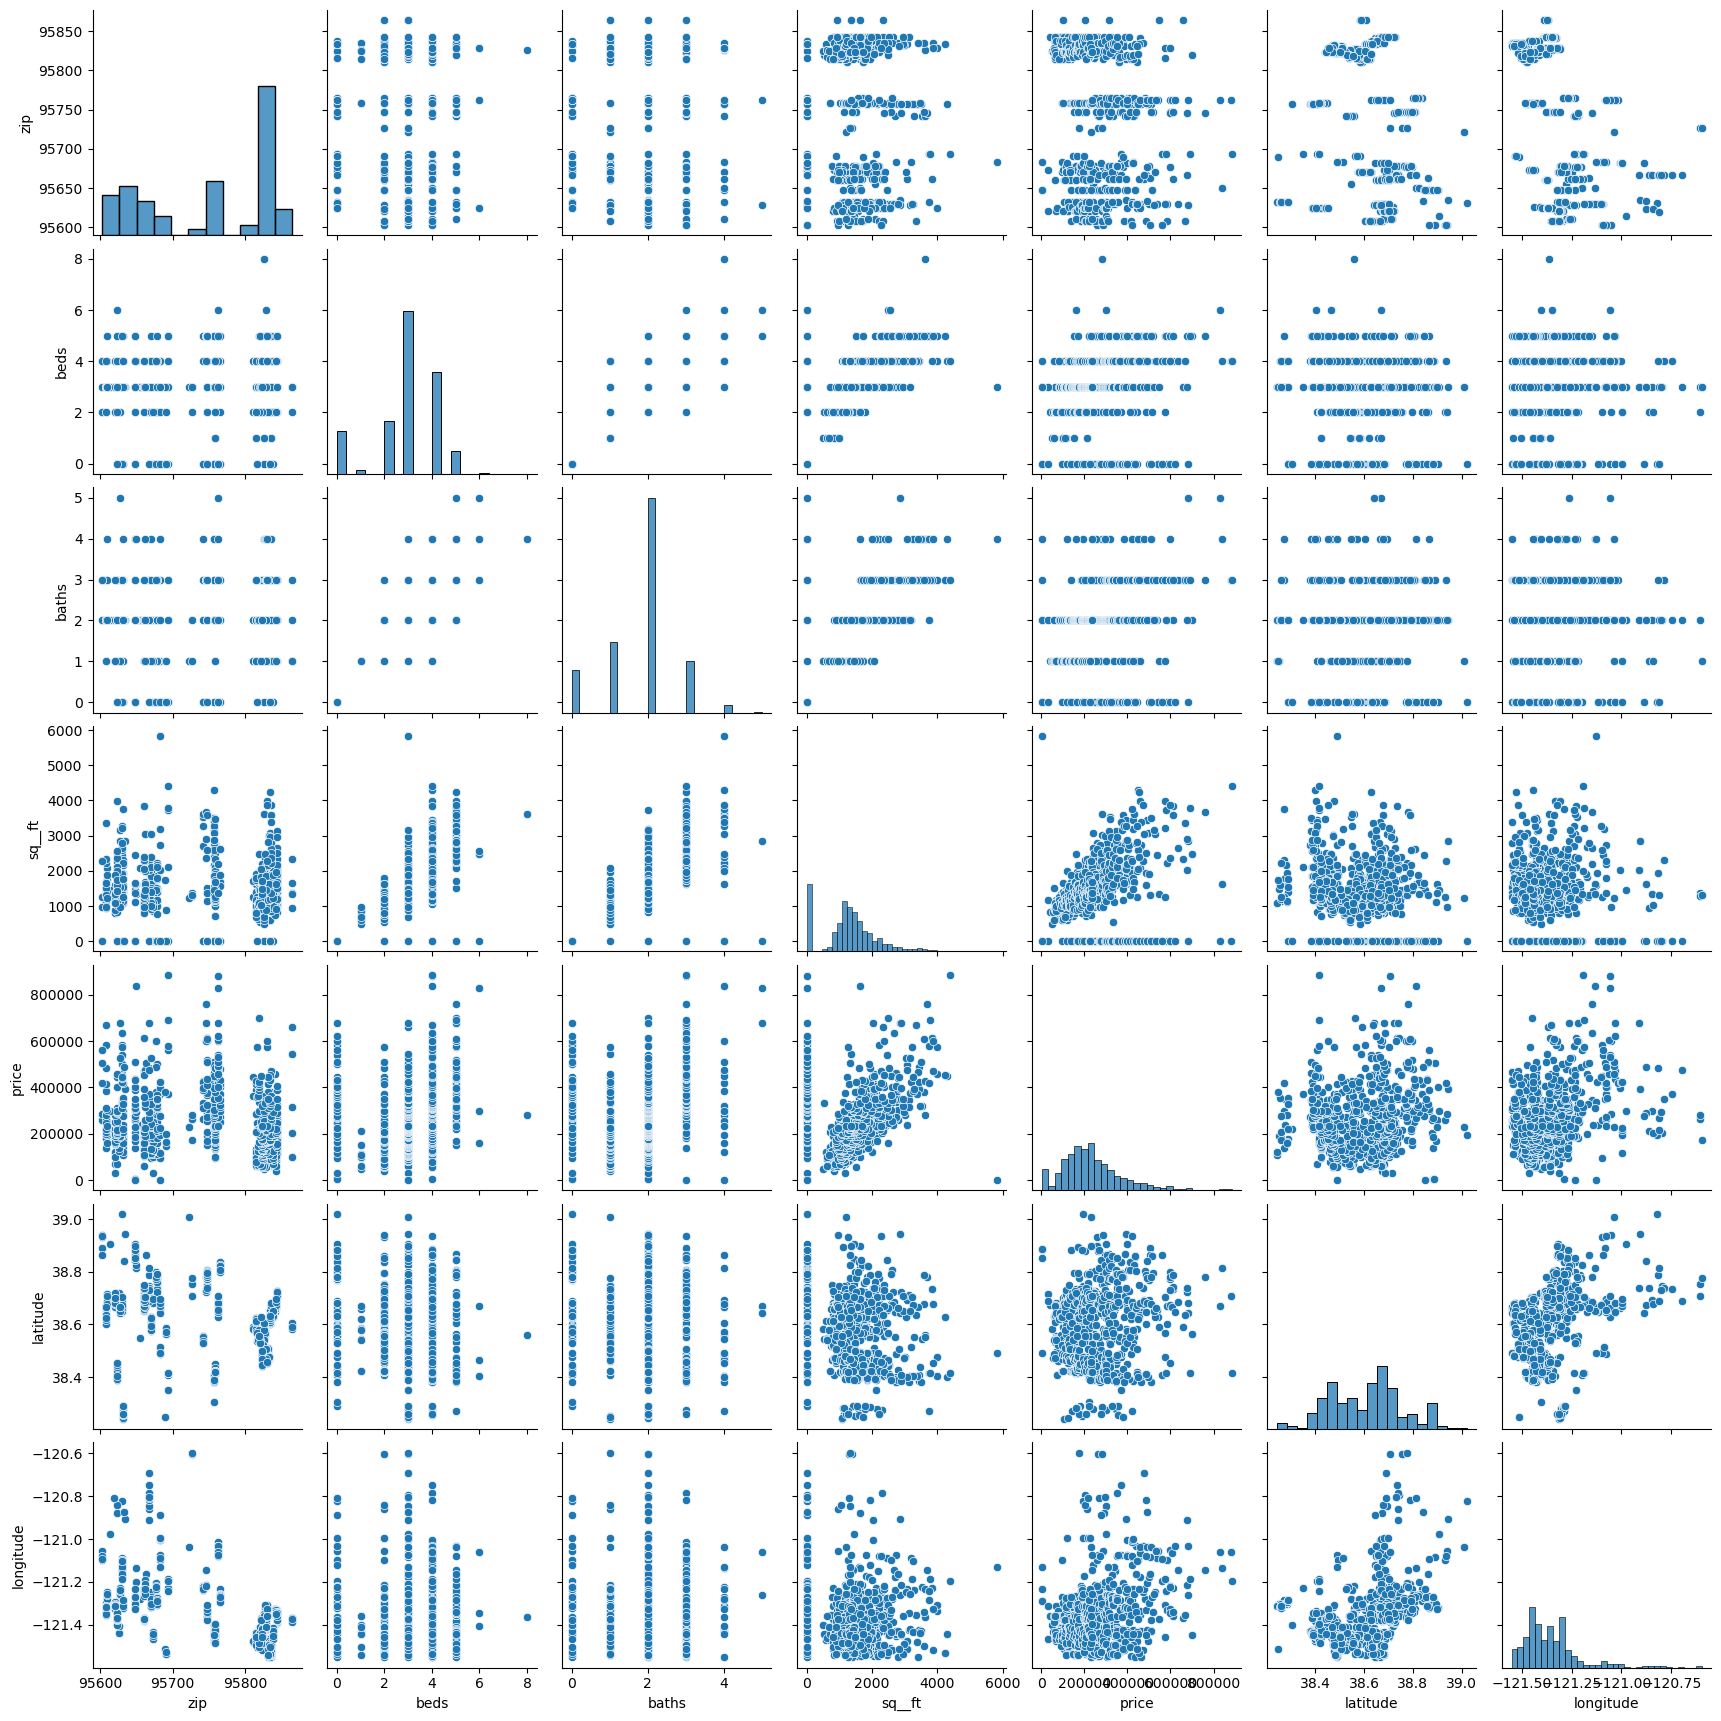

In [62]:
sns.pairplot(houses)

In [63]:
no_sq__ft = houses[houses['sq__ft'] == 0]

In [64]:
houses_clean = houses[houses['sq__ft'] > 0]

In [65]:
houses_clean[['sq__ft', 'price']].corr()

,sq__ft,price
sq__ft,1.000000,0.693708
price,0.693708,1.000000


C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

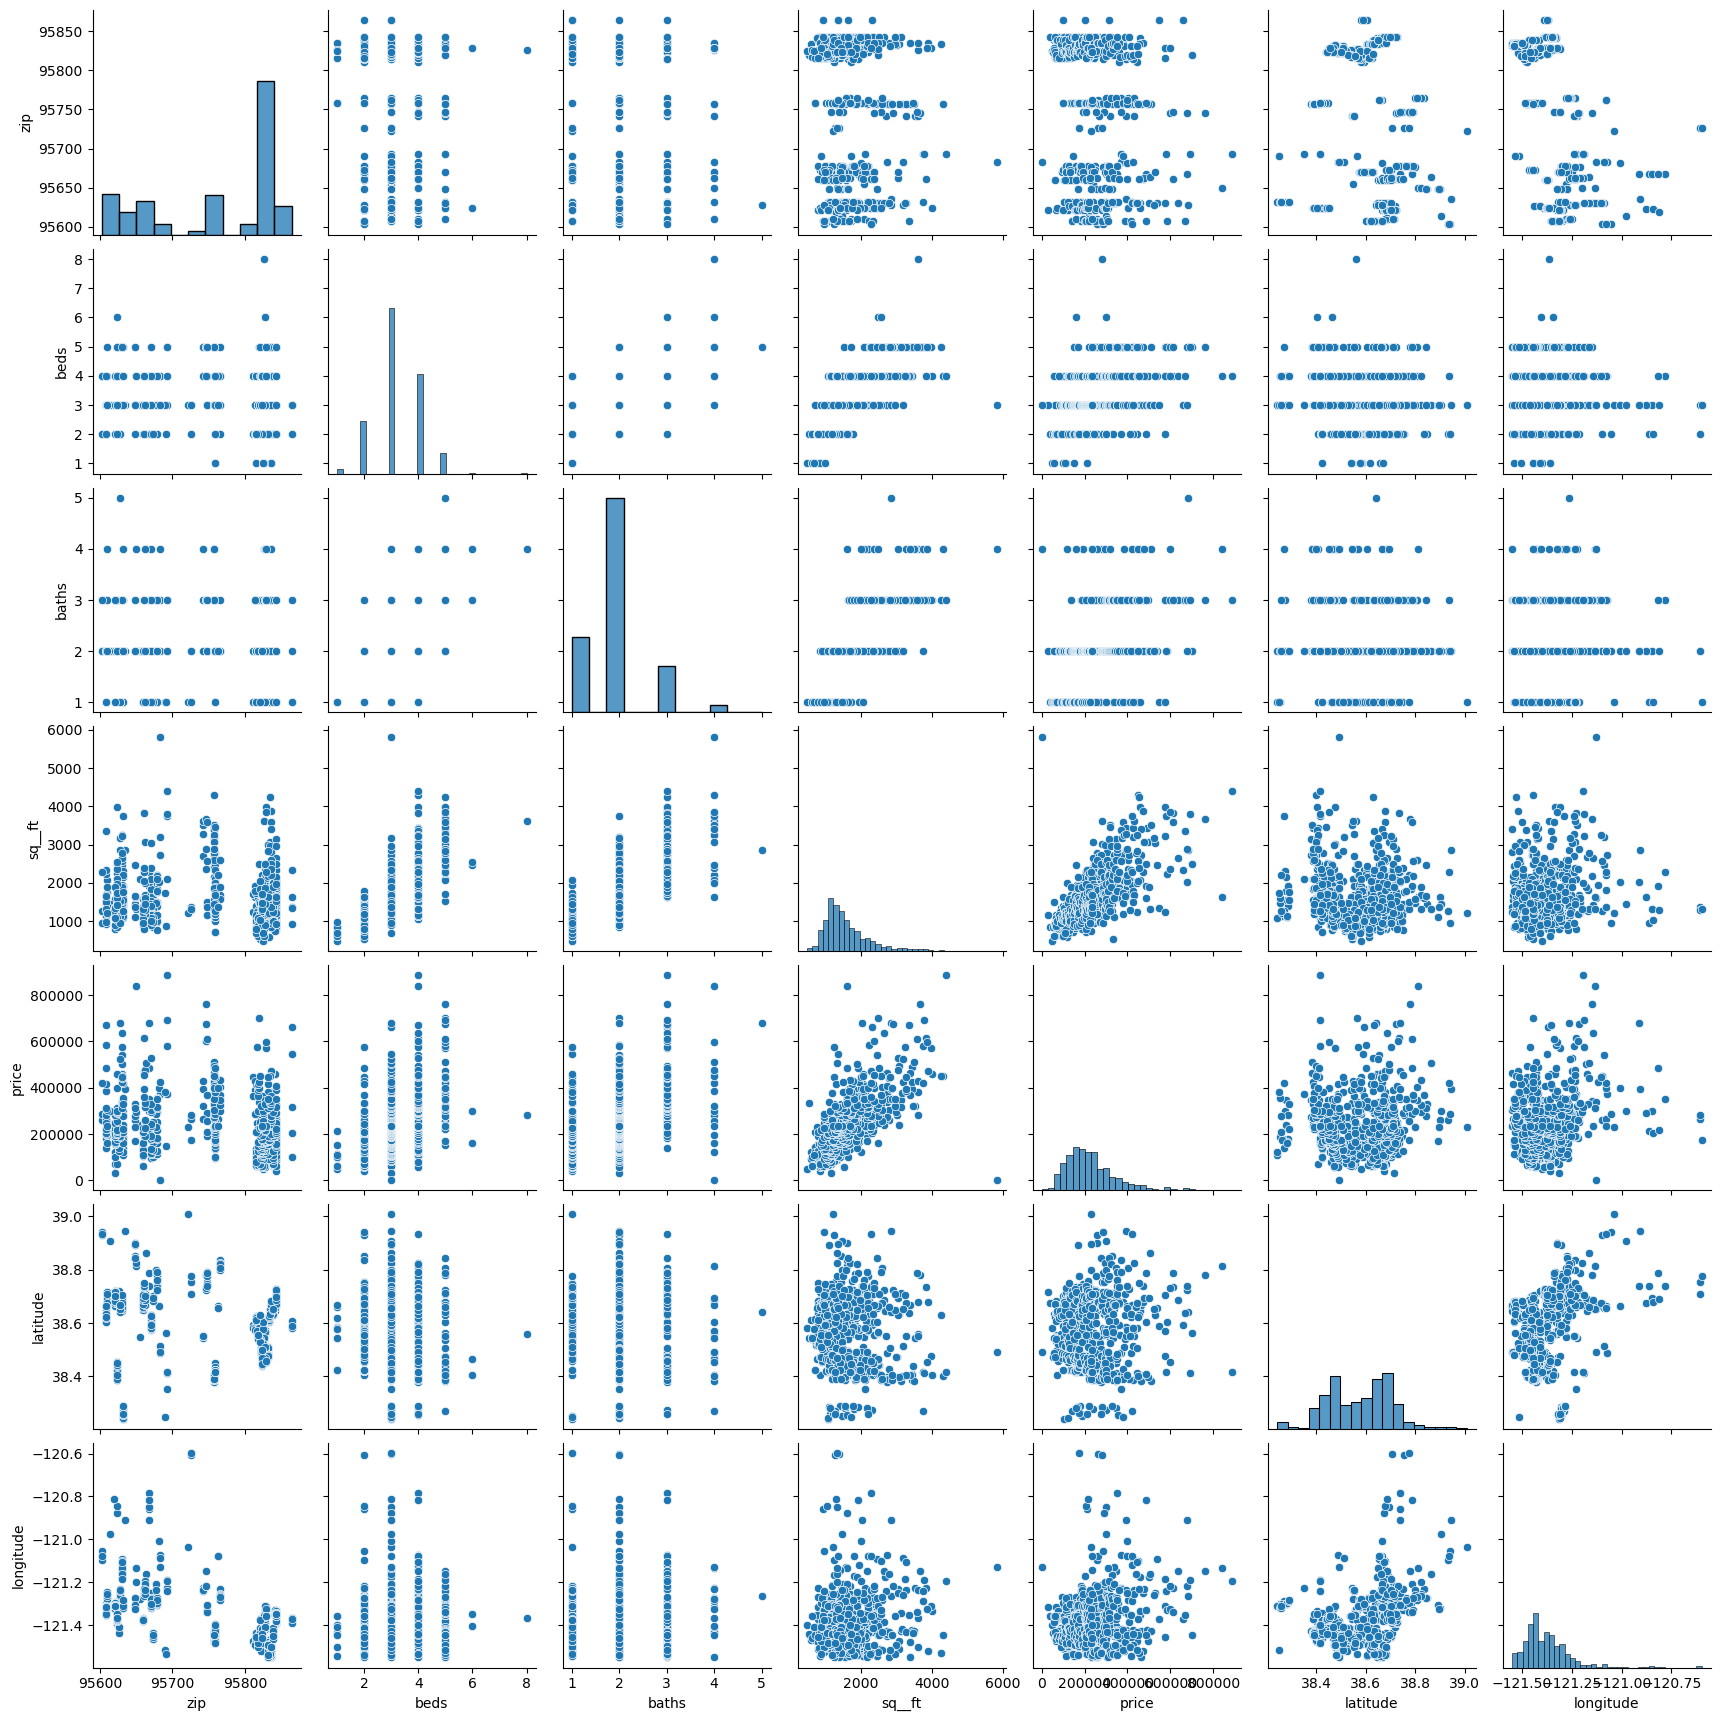

In [81]:
sns.pairplot(houses_clean)

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [66]:
# ANSWER

# Price is the target variable becaue that is the variable we are predicting. 

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [67]:
numeric_variables = houses_clean[['price', 'beds', 'baths', 'sq__ft']]
numeric_variables.corr()

,price,beds,baths,sq__ft
price,1.000000,0.441988,0.501820,0.693708
beds,0.441988,1.000000,0.654746,0.695710
baths,0.501820,0.654746,1.000000,0.724631
sq__ft,0.693708,0.695710,0.724631,1.000000


In [68]:
# ANSWER

# Potential independent variables are beds, baths and sq__ft. 

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [69]:
numeric_variables.corr()

,price,beds,baths,sq__ft
price,1.000000,0.441988,0.501820,0.693708
beds,0.441988,1.000000,0.654746,0.695710
baths,0.501820,0.654746,1.000000,0.724631
sq__ft,0.693708,0.695710,0.724631,1.000000


In [70]:
# ANSWER

# The best predictor is sq__ft because it shows good correlation with price and it's a continuous variable. 

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [71]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [72]:
# ANSWER

X = houses_clean['sq__ft'].values.reshape(-1,1)
y = houses_clean['price']

model = LinearRegression()
model.fit(X, y)

print(model.intercept_)
print(model.coef_[0])

30210.633866919
125.21648667984458


C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [73]:
# ANSWER

model.score(X, y)

C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.4812307133326901

### 3. Splitting Data

In [74]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [75]:
# ANSWER
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [76]:
# ANSWER
## Check training/test data

print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))

print(pd.DataFrame(X_train).sample(5))
print(pd.DataFrame(y_train).sample(5))

print(pd.DataFrame(y_test).sample(10))

X_train shape: (545, 1)
y_train shape: (545,)
X_test shape: (269, 1)
y_test shape: (269,)
        0
459  1462
100  1104
423  1380
353  2212
94   1596
      price
474  266000
770  293996
255  250000
250  245000
392  155000
      price
342   68000
471  261000
440  228327
273  292000
240  228000
708  215000
705  213750
476  274425
887  116000
167   92000


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [77]:
# ANSWER

X = X_train
y = y_train

model = LinearRegression()
model.fit(X, y)

print(model.intercept_)
print(model.coef_[0])

33320.16111883661
123.99646678958753


C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [78]:
# ANSWER

model.score(X, y)

C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.49300843934238503

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [79]:
# ANSWER

X_new = [[1204]]
model.predict(X_new)

array([182611.9071335])

#### Find the error

In [84]:
y_preds = model.predict(X_test)

mse = mean_squared_error(y_test, y_preds, squared=True)
print(mse)

6873464361.755377


C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):




---



---



> > > > > > > > > © 2023 Institute of Data


---



---



